In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob
# store paths to all images
paths = glob.glob('data/simpsons_dataset/*/*')

from PIL import Image

In [115]:
size_x, size_y = 128,128
# set seed for reproducability
np.random.seed(1996)
# pick 35 random images
sample_paths = np.random.choice(paths, size = 25, replace=False)
# load, resize and store said images in a list
sample_images = [Image.open(pth).resize((size_x, size_y)) for pth in sample_paths]

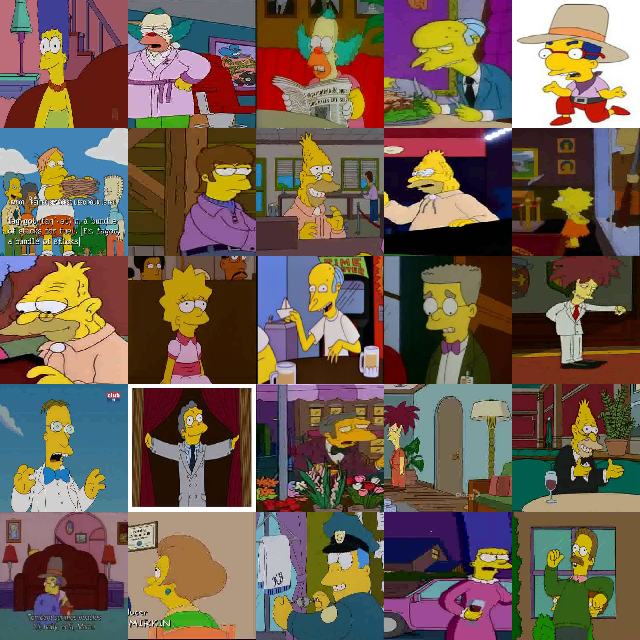

In [116]:
'''
Plot sample of images. 
To do so, past together 5 images at a time to make five rows, 
then paste the five rows together
'''
row1 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[0:5])))
row2 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[5:10])))
row3 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[10:15])))
row4 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[15:20])))
row5 = Image.fromarray(np.hstack( (np.asarray( i) for i in sample_images[20:25])))
# paste these rows together vertically
Image.fromarray(np.vstack((np.asarray(i) for i in [row1,row2,row3,row4,row5])))

---

Build a design matrix, and target vector

In [ ]:
'''
Build a design matrix. 

As is, there are 20933, each of which are in (r,g,b) format, and around 500x500 pixels. 
That's a lot of data, and I don't want to sit around forever waiting for my models to train. 

So, as a form of lossy compression, I will:
    1. Convert each image to gray scale
    2. Reshape each image to 128x128 pixels
    
Thus, each image can be represented as a 16,384 vector - which is more tractable.

At the end of this block, we will have:
    X: (numpy.ndarray) input data - each column is a pixel (in order)
    y: (numpy.ndarray) labels - character labels of characters
'''
# set the sizes for the x and y axes of image
x_size, y_size = 128, 128
# create a template for X and y
X = np.ndarray(shape = (0,x_size*y_size))
y = np.ndarray(shape = (0,))
for path in paths:
    # isolate the character's name from the path
    character = path.split('/')[-2]
    # add said character name to the target vector
    y = np.append(y, character)
    
    # Open the current image
    img = Image.open(path)
    # gray scale the image
    img = img.convert("L")
    # reshape the image
    img = img.resize((x_size, y_size))
    # flatten the image into a vector
    img_vect = np.array([list(img.getdata())])
    # add the vector to the design matrix
    X = np.concatenate((X, img_vect))

In [178]:
X.shape

(9, 16384)

In [151]:
Image.open(paths[0]).size

(576, 416)

In [162]:
y = np.append(y, 1)
np.append(y, 1)

array([ 1.,  1.,  1.,  1.])

In [159]:
y

array([], dtype=float64)

In [145]:
c = np.concatenate((X,b), axis = 0)

In [173]:
b

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [137]:
np.concatenate(X,np.array([[1 for i in range(15)]]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [138]:
 [1 for i in range(15)]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [119]:
X.shape

<attribute 'shape' of 'numpy.ndarray' objects>